In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('../logs/')

In [2]:
def plot3(name0, title=None, rate=10, cutoff=1.0, v_only=False, smooth=1):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    cutoff = int(cutoff * len(epochs0))
    if not v_only:
        x = epochs0[:cutoff]
        y = t_loss0[:cutoff]
        if smooth > 1:
            x_kernel = np.zeros(smooth)
            x_kernel[smooth // 2] = 1
            y_kernel = np.ones(smooth) / smooth
            x = np.convolve(x, x_kernel, mode='valid')
            y = np.convolve(y, y_kernel, mode='valid')
        plt.semilogy(x, y)
    x = epochs0[rate-1:cutoff:rate]
    y = v_loss0[:cutoff//rate]
    if smooth > 1:
        smooth = smooth // rate
        x_kernel = np.zeros(smooth)
        x_kernel[smooth // 2] = 1
        y_kernel = np.ones(smooth) / smooth
        x = np.convolve(x, x_kernel, mode='valid')
        y = np.convolve(y, y_kernel, mode='valid')
    plt.semilogy(x, y)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    if title: plt.title(title)

## Initial 10k (random)

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[1000, 10000], v_tuple=[0, 1000], weights='init_ab')


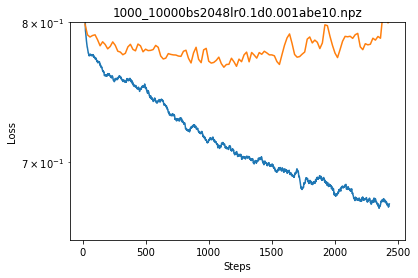

In [3]:
name = '1000_10000bs2048lr0.1d0.001abe10.npz'
plot3(name, name, rate=20, smooth=40)
plt.ylim([0.8, 0.65])
plt.show()

Namespace(batch_size=8192, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[1000, 10000], v_tuple=[0, 1000], weights='init_ab')


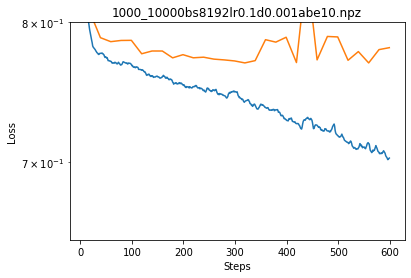

In [4]:
name = '1000_10000bs8192lr0.1d0.001abe10.npz'
plot3(name, name, rate=20, smooth=20)
plt.ylim([0.8, 0.65])
plt.show()

## 20k

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[0, 19000], v_tuple=[19000, 20000], weights='init_ab')


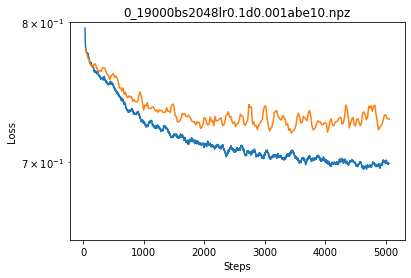

In [8]:
name = '0_19000bs2048lr0.1d0.001abe10.npz'
plot3(name, name, rate=20, smooth=60)
plt.ylim([0.8, 0.65])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=20, lr=0.1, momentum=0.9, t_tuple=[0, 19000], v_tuple=[19000, 20000], weights='init_ab')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[0, 19000], v_tuple=[19000, 20000], weights='init_ab')


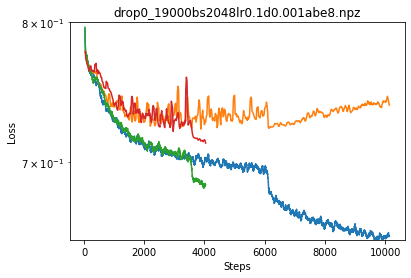

In [9]:
name = 'drop0_19000bs2048lr0.1d0.001abe20.npz'
plot3(name, name, rate=20, smooth=60)
name = 'drop0_19000bs2048lr0.1d0.001abe8.npz'
plot3(name, name, rate=20, smooth=60)
plt.ylim([0.8, 0.65])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[0, 19000], v_tuple=[19000, 20000], weights='init_ab')


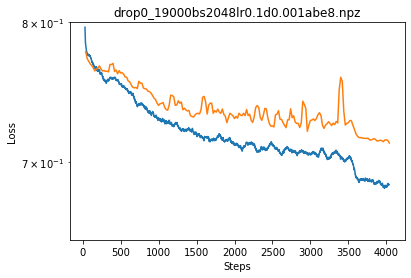

In [6]:
name = 'drop0_19000bs2048lr0.1d0.001abe8.npz'
plot3(name, name, rate=20, smooth=60)
plt.ylim([0.8, 0.65])
plt.show()

## 30k
Train-test gap is significantly minimized compared to previous runs

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[0, 29000], v_tuple=[29000, 30000], weights='init_ab')


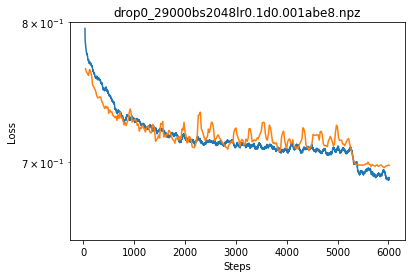

In [5]:
name = 'drop0_29000bs2048lr0.1d0.001abe8.npz'
plot3(name, name, rate=20, smooth=60)
plt.ylim([0.8, 0.65])
plt.show()

## 40k
Train-test gap is bigger, and final val loss is a bit higher. This could be due to fixing the alpha/beta reset bug, resulting in a different kind (hopefully stronger) of training data.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[0, 39000], v_tuple=[39000, 40000], weights='init_ab')
Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[0, 39000], v_tuple=[39000, 40000], weights='init_ab')


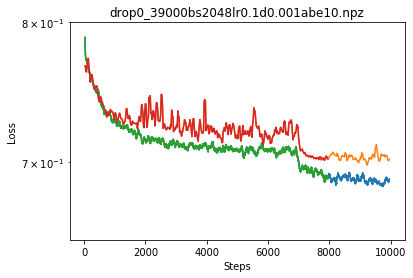

In [6]:
name = 'drop0_39000bs2048lr0.1d0.001abe10.npz'
plot3(name, name, rate=20, smooth=60)
plot3(name, name, rate=20, smooth=60, cutoff=8/10)
plt.ylim([0.8, 0.65])
plt.show()